In [2]:
using LinearAlgebra
using PyPlot

Degenerate perturbation theory for one fermion in a bosonic bath at unit filling on a lattice of L sites, the inter and intraspecies interactions are infinite, the perturbation is done on the hopping terms.

In [3]:
function AddTermOpenOpen!(ΔH, L, x, y, δh)
    ii, jj = x
    kk, ll = y

    if kk == 0 || kk == L+1 || ll == 0 || ll == L+1
        return 0
    else
        n = L*(ii-1)+jj
        m = L*(kk-1)+ll
        ΔH[n,m] = δh
        return 0
    end
end

AddTermOpenOpen! (generic function with 1 method)

In [4]:
function AddTermClosedOpen!(ΔH, L, x, y, δh)
    ii, jj = x
    kk, ll = y

    if kk == 0 || kk == L+1
        return 0
    else
        ll = (ll-1+L)%L+1
        
        n = L*(ii-1)+jj
        m = L*(kk-1)+ll
        ΔH[n,m] = δh
        return 0
    end
end

AddTermClosedOpen! (generic function with 1 method)

In [5]:
function ConstructHamiltonian(L, AddTerm!)
    ΔH = zeros(L^2, L^2)
    for ii in 1:L
        for jj in 1:L
    
            if ii == jj
                AddTerm!(ΔH, L, (ii, jj), (ii-1, jj-1), -1 )
                AddTerm!(ΔH, L, (ii, jj), (ii+1, jj+1), -1 )
                AddTerm!(ΔH, L, (ii, jj), (ii,   jj-1), -√2)
                AddTerm!(ΔH, L, (ii, jj), (ii,   jj+1), -√2)
            else
                if jj == (ii+1-1+L)%L+1  
                    AddTerm!(ΔH, L, (ii, jj), (ii, jj-1), -√2)
                else
                    AddTerm!(ΔH, L, (ii, jj), (ii, jj-1),  -2)
                end
    
                if jj == (ii-1-1+L)%L+1
                    AddTerm!(ΔH, L, (ii, jj), (ii, jj+1), -√2)
                else
                    AddTerm!(ΔH, L, (ii, jj), (ii, jj+1),  -2)
                end
            end
        end
    end
    return Symmetric(ΔH)
end

ConstructHamiltonian (generic function with 1 method)

-3.9794772935675797 0.0005310247017753511
-3.999353579137513 0.0017595009465365408


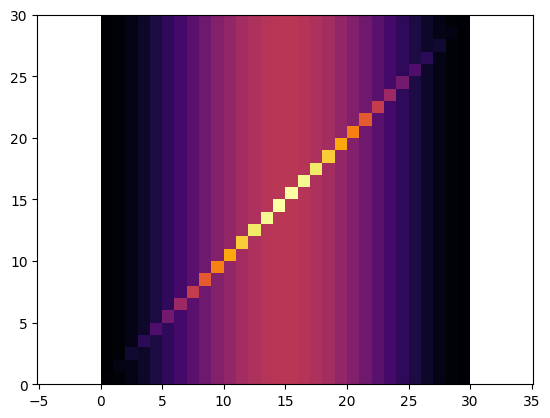

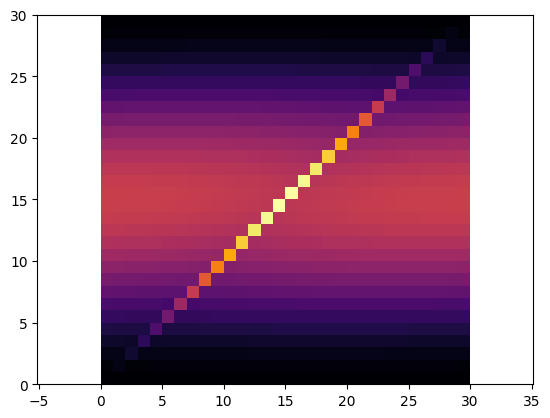

In [61]:
L = 30

ΔH = ConstructHamiltonian(L, AddTermOpenOpen!)
E, Ψ = eigen(ΔH)
print(E[1])
print(" ")
println(E[2]-E[1])
ψ₀ = Ψ[:,1]
fig, ax = subplots()
ax.pcolormesh(reshape(ψ₀.^2, (L,L))', cmap="inferno")
ax.set_xlim(0,L)
ax.set_ylim(0,L)
ax.axis("equal")
fig.show()

ΔH = ConstructHamiltonian(L, AddTermClosedOpen!)
E, Ψ = eigen(ΔH)
print(E[1])
print(" ")
println(E[2]-E[1])
ψ₀ = Ψ[:,1]
fig, ax = subplots()
ax.pcolormesh(reshape(ψ₀.^2, (L,L))', cmap="inferno")
ax.set_xlim(0,L)
ax.set_ylim(0,L)
ax.axis("equal")
fig.show()

In [9]:
function GetDensities(L, ψ)
    
    nᶠ=zeros(L)
    for ll in eachindex(ψ₀)
        ii = (ll-1)÷L+1
        nᶠ[ii] += ψ₀[ll]^2
    end
    
    nᵇ=zeros(L)
    for ll in eachindex(ψ₀)
        ii = (ll-1)÷L+1
        jj = (ll-1)%L+1
        if ii == jj
            for kk in eachindex(nᵇ)
                nᵇ[kk] += ψ₀[ll]^2
            end
        else
            for kk in eachindex(nᵇ)
                if kk == jj
                    nᵇ[kk] += 2*ψ₀[ll]^2
                elseif kk ≠ ii 
                    nᵇ[kk] += ψ₀[ll]^2
                end
            end
        end 
    end

    return nᶠ, nᵇ
end

GetDensities (generic function with 2 methods)

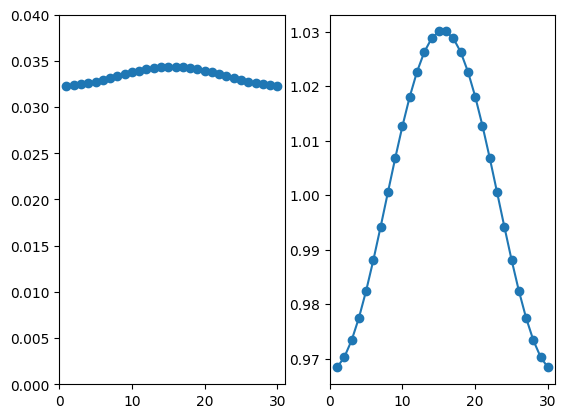

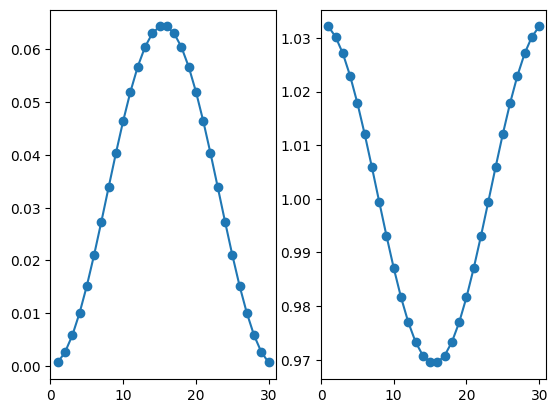

In [38]:
L = 30

ΔH = ConstructHamiltonian(L, AddTermOpenOpen!)
E, Ψ = eigen(ΔH)
ψ₀ = Ψ[:,1]
fig, ax = subplots(1,2)
nᶠ, nᵇ = GetDensities(L, ψ₀)
ax[1].plot(1:L, nᶠ, marker="o")
ax[2].plot(1:L, nᵇ, marker="o")
ax[1].set_xlim(0,L+1)
ax[1].set_ylim(0,0.04)
ax[2].set_xlim(0,L+1)
fig.show()

ΔH = ConstructHamiltonian(L, AddTermClosedOpen!)
E, Ψ = eigen(ΔH)
ψ₀ = Ψ[:,1]
fig, ax = subplots(1,2)
nᶠ, nᵇ = GetDensities(L, ψ₀)
ax[1].plot(1:L, nᶠ, marker="o")
ax[2].plot(1:L, nᵇ, marker="o")
ax[1].set_xlim(0,L+1)
ax[2].set_xlim(0,L+1)
fig.show()

In [31]:
function GetSPDM(L, ψ)
    ρ = zeros(L,L)
    
    for ii in 1:L
        for jj in 1:L
            
            if ii≠jj
                n = L*(ii-1)+jj
                ρ[ii, ii] += ψ[n]^2
            end

            n = L*(ii-1)+ii
            m = L*(jj-1)+jj
            ρ[ii, jj] += ψ[n]*ψ[m]
            
        end
    end
    
    return ρ
end

GetSPDM (generic function with 1 method)

3.360877673520802
3.0959339349446156


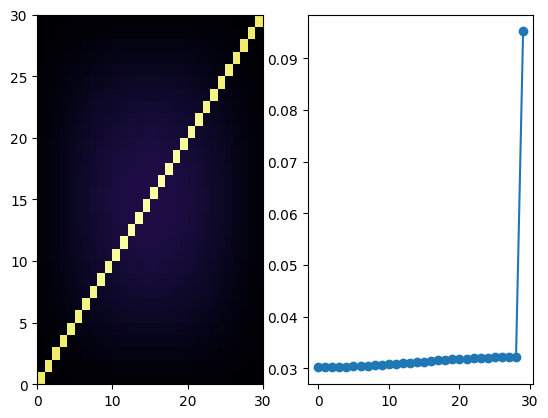

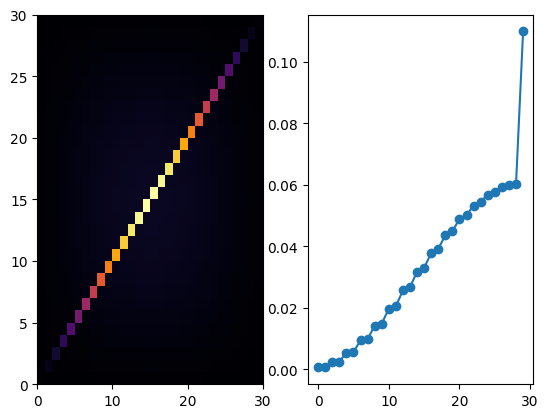

In [52]:
L = 30

ΔH = ConstructHamiltonian(L, AddTermOpenOpen!)
E, Ψ = eigen(ΔH)
ψ₀ = Ψ[:,1]
ρ = GetSPDM(L, ψ₀)
λ = eigvals(ρ)
println(sum(-λ.*log.(λ)))
fig, ax = subplots(1,2)
ax[1].pcolormesh(ρ, cmap="inferno")
ax[2].plot(λ, marker="o")
fig.show()

ΔH = ConstructHamiltonian(L, AddTermClosedOpen!)
E, Ψ = eigen(ΔH)
ψ₀ = Ψ[:,1]
ρ = GetSPDM(L, ψ₀)
λ = eigvals(ρ)
println(sum(-λ.*log.(λ)))
fig, ax = subplots(1,2)
ax[1].pcolormesh(ρ, cmap="inferno")
ax[2].plot(λ, marker="o")
fig.show()